# Introduction

In this notebook we'll attack the MedNIST data set presented in the previous notebook using a deep learning library called _fastai_. We'll also study another, more difficult data set.

> **Note:** To run this notebook locally you have to have the fastai library installed. See https://docs.fast.ai for instructions if you want to install on your own computer. If you're using Google Colab or Paperspace Gradient, running the notebook will install what's necessary.

# Setup

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
if 'google.colab' in str(get_ipython()):
    print('The notebook is running on Colab. colab=True.')
    colab=True
else:
    print('The notebook is not running on Colab. colab=False.')
    colab=False

The notebook is not running on Colab. colab=False.


In [2]:
# Set to True if you're using Paperspace Gradient:
gradient=False

In [3]:
if colab or gradient:
    !pip install -Uqq fastbook
    import fastbook
    fastbook.setup_book()
    from fastbook import *
    !pip install fastai-amalgam
    !pip install palettable
    !pip install matplotlib_venn
    from fastai.vision.all import *
    NB_DIR = Path.cwd()
else:
    from fastai.vision.all import *
    NB_DIR = Path.cwd()
    DATA = NB_DIR    
    
if colab:
    DATA = Path('./gdrive/MyDrive/ColabData')
    DATA.mkdir(exist_ok=True)
if gradient:
    DATA = Path('/storage')
    DATA.mkdir(exist_ok=True)


In [4]:
import os, shutil, gc

# Load data

In [5]:
if gradient:
    path = untar_data("https://www.dropbox.com/s/5wwskxctvcxiuea/MedNIST.tar.gz?dl=1", archive='MedNIST.tar.gz', dest='/storage')
else:
    path = untar_data("https://www.dropbox.com/s/5wwskxctvcxiuea/MedNIST.tar.gz?dl=1", archive='MedNIST.tar.gz')

In [6]:
path.ls()

(#7) [Path('/home/ubuntu/.fastai/data/MedNIST/HeadCT'),Path('/home/ubuntu/.fastai/data/MedNIST/CXR'),Path('/home/ubuntu/.fastai/data/MedNIST/Hand'),Path('/home/ubuntu/.fastai/data/MedNIST/AbdomenCT'),Path('/home/ubuntu/.fastai/data/MedNIST/BreastMRI'),Path('/home/ubuntu/.fastai/data/MedNIST/ChestCT'),Path('/home/ubuntu/.fastai/data/MedNIST/README.md')]

We set up a data loader, more precisely a fastai [`ImageDataLoader`](https://docs.fast.ai/vision.data.html#ImageDataLoaders), setting aside 30% of the images as validation data:

In [7]:
fnames = get_image_files(path)
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, valid_pct=0.3)

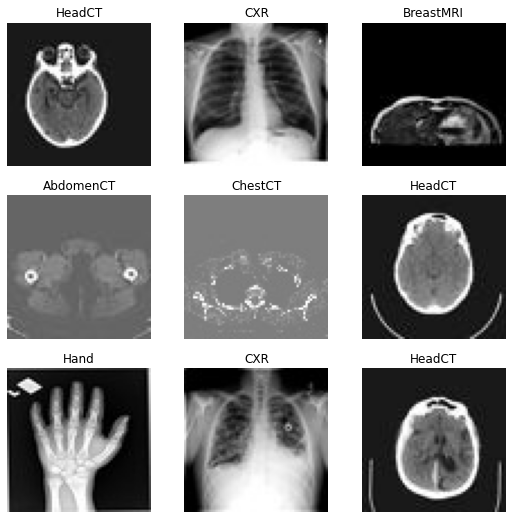

In [8]:
dls.show_batch()

In [9]:
print(f'Number of training images: {len(dls.train_ds)}')
print(f'Number of validation images: {len(dls.valid_ds)}')

Number of training images: 41268
Number of validation images: 17686


# Train a model

Here we create what fastai calls a _learner_. It's created from the above dataloaders and its neural network has a specific architecture (and is pretrained on a large 1.4 million image set from the ImageNet competition). Here we use a `resnet18`. 

In [10]:
learn = cnn_learner(dls, resnet18, pretrained=True, metrics=accuracy)

Let's train it for a bit:

In [11]:
learn.fine_tune(1)

Essentially 100% accurate on the validation data after seconds of training.

# Evaluate model

We can have a look at some predictions:

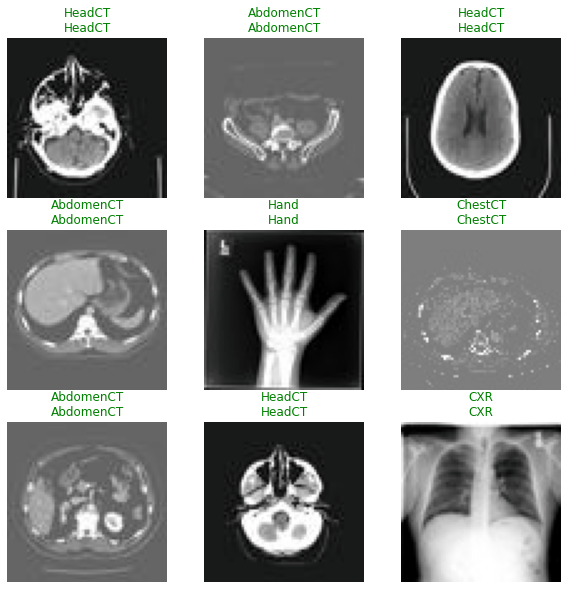

In [12]:
learn.show_results(figsize=(10,10))

...and also the confusion matrix and the images it found most difficult

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

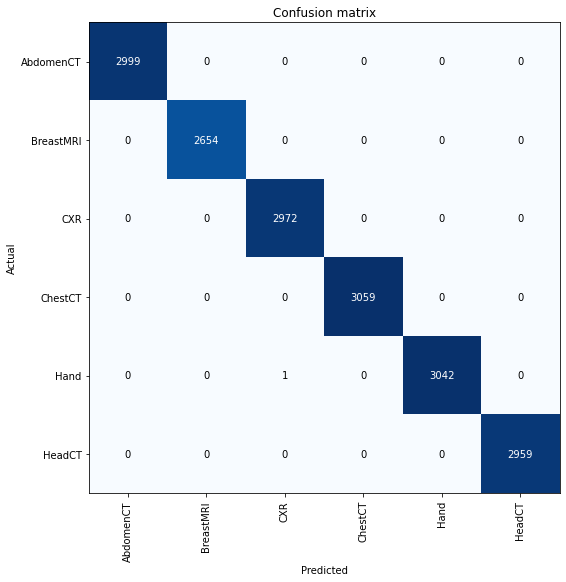

In [14]:
interp.plot_confusion_matrix(figsize=(8,8))

Here are the four images the model misclassified and the ones it was closest to misclassifying, in the order of model confidence:

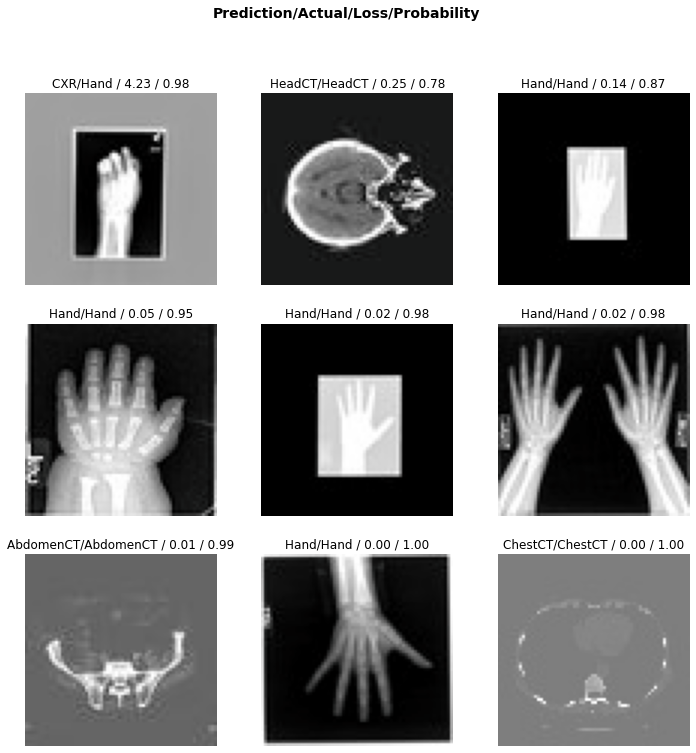

In [15]:
interp.plot_top_losses(9, figsize=(12,12))

We see that the problem is too simple when we're using such powerful methods as above. Let's try another!

In [16]:
# Free up memory:
learn = None
dls = None
path=None
gc.collect()
torch.cuda.empty_cache()

# Another example

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
if 'google.colab' in str(get_ipython()):
    print('The notebook is running on Colab. colab=True.')
    colab=True
else:
    print('The notebook is not running on Colab. colab=False.')
    colab=False

# Set to True if you're using Paperspace Gradient:
gradient=False

if colab or gradient:
    !pip install -Uqq fastbook
    import fastbook
    fastbook.setup_book()
    from fastbook import *
    !pip install fastai-amalgam
    !pip install palettable
    !pip install matplotlib_venn
    from fastai.vision.all import *
    NB_DIR = Path.cwd()
else:
    from fastai.vision.all import *
    NB_DIR = Path.cwd()
    DATA = NB_DIR    
    
if colab:
    DATA = Path('./gdrive/MyDrive/ColabData')
    DATA.mkdir(exist_ok=True)
if gradient:
    DATA = Path('/storage')
    DATA.mkdir(exist_ok=True)


The notebook is not running on Colab. colab=False.


In [2]:
import os, shutil, gc

We need something more challenging to see what we can achieve with such more powerful models and training methods. 

Let's keep things relatively simple by using one of the data sets collected in the repository _fast.ai Datasets_ (https://course.fast.ai/datasets). You'll find the options using the previous link, or by looking at

In [3]:
print([d for d in dir(URLs) if '__' not in d])

['ADULT_SAMPLE', 'AG_NEWS', 'AMAZON_REVIEWS', 'AMAZON_REVIEWS_POLARITY', 'BIWI_HEAD_POSE', 'BIWI_SAMPLE', 'CALTECH_101', 'CAMVID', 'CAMVID_TINY', 'CARS', 'CIFAR', 'CIFAR_100', 'COCO_SAMPLE', 'COCO_TINY', 'CUB_200_2011', 'DBPEDIA', 'DOGS', 'FLOWERS', 'FOOD', 'GOOGLE', 'HUMAN_NUMBERS', 'IMAGENETTE', 'IMAGENETTE_160', 'IMAGENETTE_320', 'IMAGEWANG', 'IMAGEWANG_160', 'IMAGEWANG_320', 'IMAGEWOOF', 'IMAGEWOOF_160', 'IMAGEWOOF_320', 'IMDB', 'IMDB_SAMPLE', 'LOCAL_PATH', 'LSUN_BEDROOMS', 'MACAQUES', 'MDL', 'ML_100k', 'ML_SAMPLE', 'MNIST', 'MNIST_SAMPLE', 'MNIST_TINY', 'MNIST_VAR_SIZE_TINY', 'MT_ENG_FRA', 'OPENAI_TRANSFORMER', 'PASCAL_2007', 'PASCAL_2012', 'PETS', 'PLANET_SAMPLE', 'PLANET_TINY', 'S3', 'S3_AUDI', 'S3_COCO', 'S3_IMAGE', 'S3_IMAGELOC', 'S3_MODEL', 'S3_NLP', 'SIIM_SMALL', 'SOGOU_NEWS', 'TCGA_SMALL', 'URL', 'WIKITEXT', 'WIKITEXT_TINY', 'WT103_BWD', 'WT103_FWD', 'YAHOO_ANSWERS', 'YELP_REVIEWS', 'YELP_REVIEWS_POLARITY', 'ZEBRA_FINCH', 'path']


Let's use the Caltech-UCSD Birds-200-2011 data sets of 200 different bird species, with 11,788 images in total:<br>
<img src="assets/birds_collage.jpg">

In [4]:
path = untar_data(URLs.CUB_200_2011)

Let's figure out what we've downloaded. In particular, where we can find the images and the corresponding image labels:

In [5]:
path.ls()

(#2) [Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/attributes.txt')]

In [6]:
(path/'CUB_200_2011').ls()

(#9) [Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/parts'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/README'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt')]

In [7]:
images = path/'CUB_200_2011'/'images'
images.ls()

(#200) [Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/112.Great_Grey_Shrike'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/143.Caspian_Tern'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/194.Cactus_Wren'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/109.American_Redstart'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/060.Glaucous_winged_Gull'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/098.Scott_Oriole'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/072.Pomarine_Jaeger'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/087.Mallard'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/030.Fish_Crow'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/190.Red_cockaded_Woodpecker')...]

We see that the images are stored in 200 separate subfolders whose names are the bird species.

In [8]:
(path/'CUB_200_2011'/'images'/'051.Horned_Grebe').ls()

(#60) [Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0085_34713.jpg'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0077_34587.jpg'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0006_34718.jpg'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0063_34966.jpg'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0029_34557.jpg'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0001_34723.jpg'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0045_34859.jpg'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0064_35015.jpg'),Path('/home/ubuntu/.fastai/data/CUB_200_2011/CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_00

There are 60 Horned Grebes. Here's one:

In [9]:
fname = path/'CUB_200_2011'/'images'/'051.Horned_Grebe'/'Horned_Grebe_0069_34990.jpg'

In [10]:
from fastai.vision import *

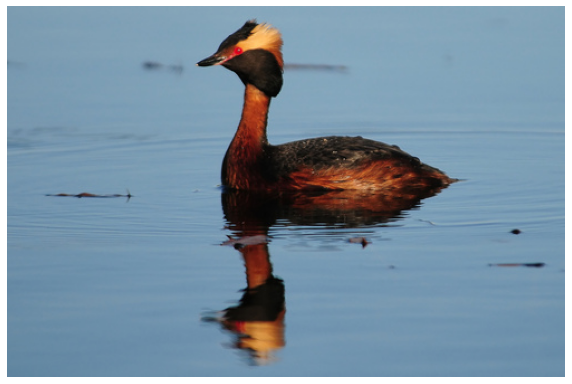

In [27]:
im = Image.open(fname)
show_image(im, figsize=(10,10))
plt.show()

In [28]:
im.shape

(332, 500)

## Create a dataloader:

In [29]:
item_sz=300
db = DataBlock(blocks=(ImageBlock, CategoryBlock), 
               get_items=get_image_files,
               get_y=parent_label,
               splitter=RandomSplitter(seed=42),
               item_tfms=Resize(item_sz),
               batch_tfms=Normalize.from_stats(*imagenet_stats)
              )

In [30]:
# If you run out of GPU memory, then you can lower the batch size
bs=64
dls = db.dataloaders(images, bs=64)

In [31]:
print(f'Number of training images: {len(dls.train_ds)}')
print(f'Number of validation images: {len(dls.valid_ds)}')

Number of training images: 9431
Number of validation images: 2357


Here are a few images from one batch (batch size is set to 64, these are 6 of them chosen at random).

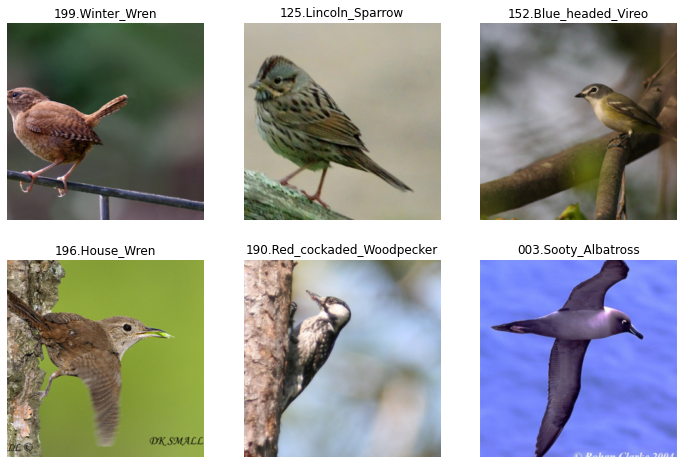

In [32]:
dls.show_batch(max_n=6, figsize=(12,8))

We create a learner as above.

In [33]:
learn = cnn_learner(dls, resnet18, metrics=accuracy).to_fp16()

/home/ubuntu/anaconda3/envs/pcs956/lib/python3.8/site-packages/fastai/callback/schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


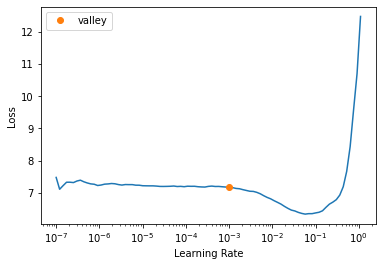

In [34]:
lr = learn.lr_find()

In [35]:
lr

SuggestedLRs(valley=0.0010000000474974513)

In [36]:
learn.fine_tune(5, base_lr=lr.valley)

### Is this a good result?

Here's the state-of-the-art on the same data set from 2014: https://pub.inf-cv.uni-jena.de/pdf/Goering14:NPT.

<img src="assets/goering.png">

<img src="assets/goering_approach.png">

Not too bad for something that could be constructed this easily.

Later in this notebook and in the course we'll learn several tricks that could be used to improve the results (e.g. progressive resizing, more advanced data augmentation, ensembling, and more).

## Evaluating the model

Here are a few predictions on validation data:

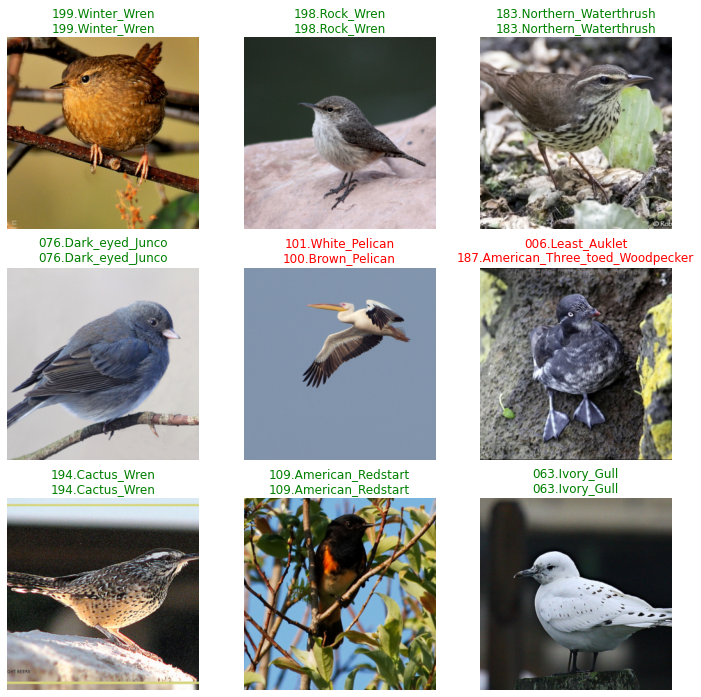

In [37]:
learn.show_results(figsize=(12,12))

In [38]:
interp = ClassificationInterpretation.from_learner(learn)

These are the images the model was most confident on, while also incorrect. I.e. in some sense the worst mistakes:

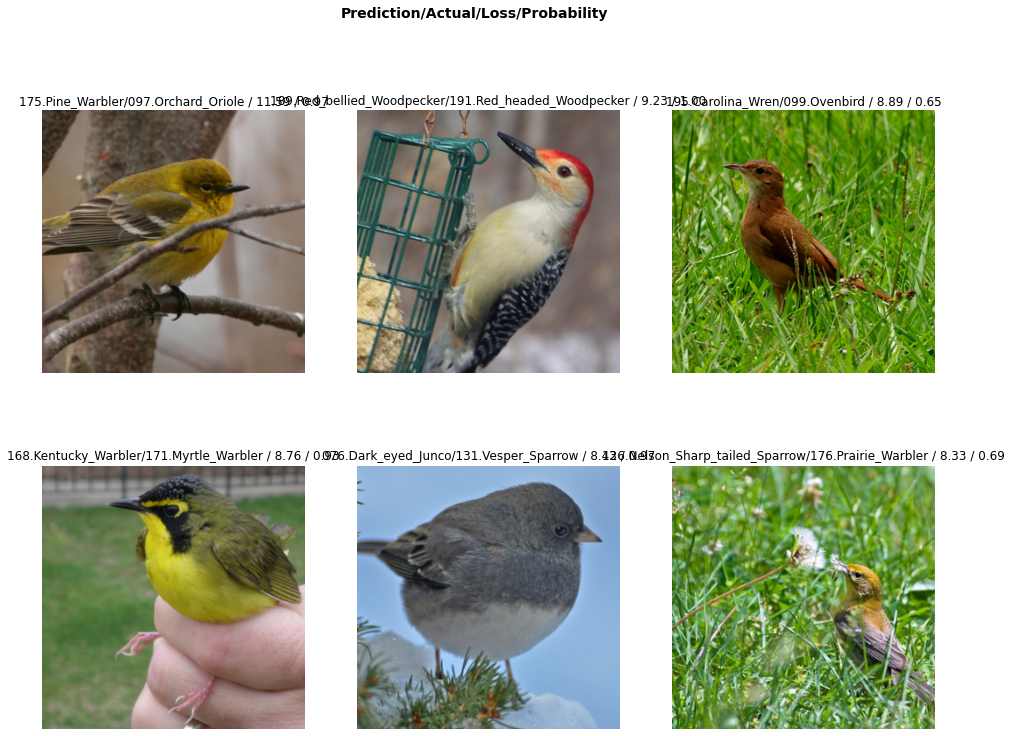

In [39]:
interp.plot_top_losses(6, figsize=(16,12))

### Inspecting the model

By extracting the gradients belonging to each of the classes in the data set as they flow into the final convolutional layer in the image, one can produce a heatmap that indicates where in the image the model based its predictions on.

<img src="assets/gradcam.png">

We'll use the gradCAM implementation from [fastai-amalgam](https://github.com/Synopsis/amalgam). You can have a look [here](https://github.com/Synopsis/amalgam/blob/master/fastai_amalgam/interpret/gradcam.py) for details.

In [40]:
import sys
!{sys.executable} -m pip install matplotlib_venn fastai_amalgam
!conda install --yes --prefix {sys.prefix} palettable

Solving environment: done

# All requested packages already installed.



In [41]:
# See the file `some_utils.py` to check what's imported here
# to compute the gradcam maps.
sys.path.append("../")
from some_utils import *

/home/ubuntu/anaconda3/envs/pcs956/lib/python3.8/site-packages/fastai_amalgam/interpret/gradcam.py:65: UserWarning: Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened
  warnings.warn(f"Detected a pooling layer in the model body. Unless this is intentional, ensure that the feature map is not flattened")
/home/ubuntu/anaconda3/envs/pcs956/lib/python3.8/site-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/home/ubuntu/anaconda3/envs/pcs956/lib/python3.8/site-packages/fastai_amalgam/utils.py:92: UserWarning: Loaded default PIL ImageFont. It's highly recommended you use a custo

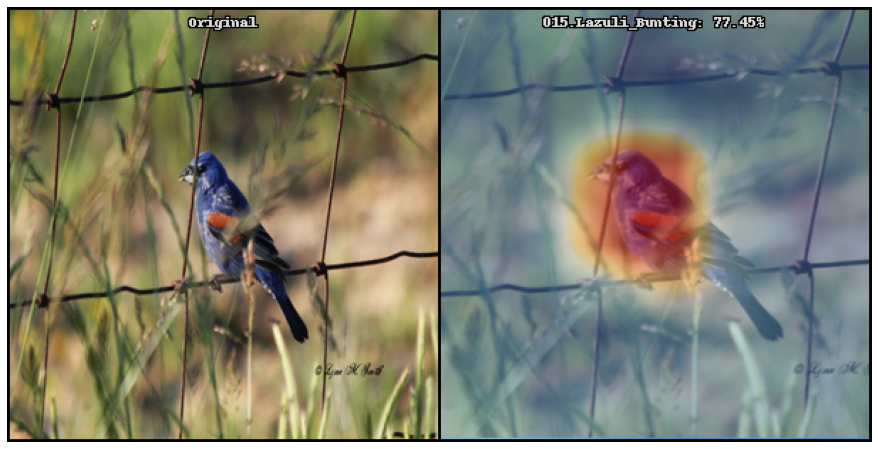

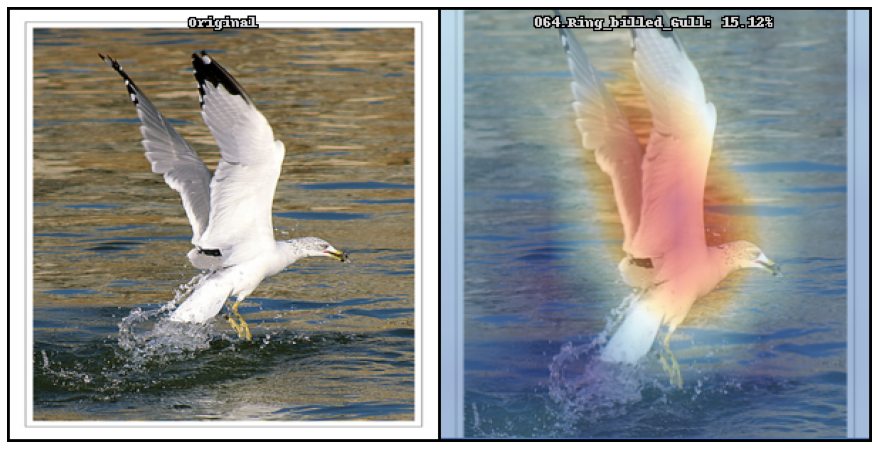

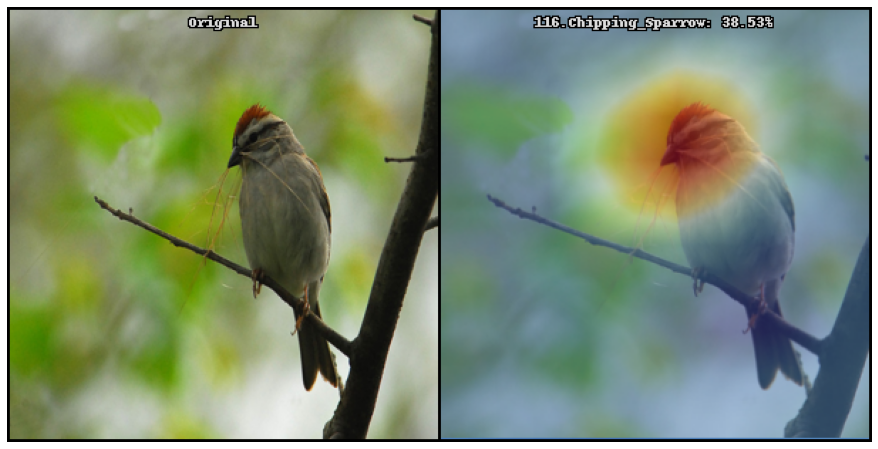

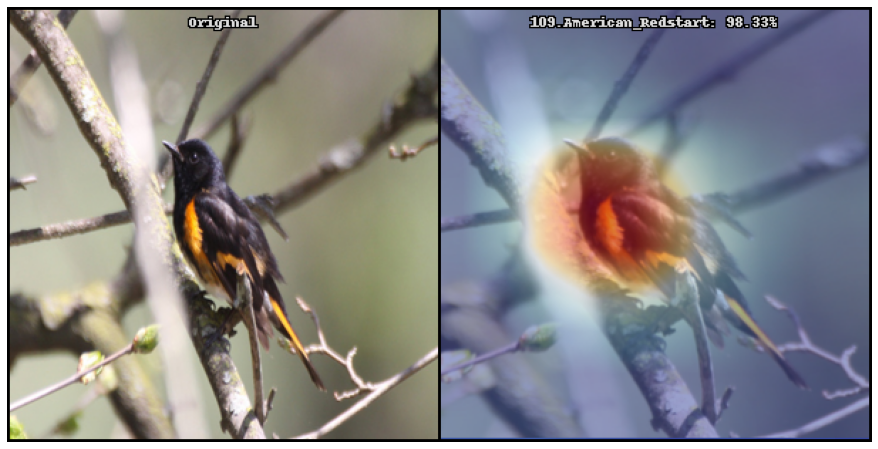

In [42]:
import random
for img_fn in random.choices(dls.valid_ds.items, k=4):
    gcam = gradcam(learn, img_fn, show_original=True)
    f = plt.figure(figsize=(16,8))
    plt.imshow(gcam)
    plt.axis('off')
    plt.show()

## Improving the results

In [43]:
# Free up memory:
learn = None
dls = None
gc.collect()
torch.cuda.empty_cache()

### Data augmentation

We'll do some transformations of the data as in the PyTorch notebook. The rotation and flips are examples of **data augmentation**. By randomly changing the images by rotation and left-right horisontal flips while keeping their labels one can in a sense create "extra" training data. And also make the trained model more robust for those transformations. 

In [11]:
# Note: To speed up processing and use less GPU memory (at the cost of accuracy), 
# one can set the sizes in the Resize methods to something smaller

item_sz = 500
batch_sz = 400

if colab or gradient:
    item_sz = 400
    batch_sz = 300
    

item_tfms = Resize(item_sz, method='pad', pad_mode='zeros')

batch_tfms = [Resize(batch_sz, method='pad', pad_mode='zeros'), Flip(), Zoom(),
              Contrast(), Rotate(max_deg=20), Normalize.from_stats(*imagenet_stats)]


db = DataBlock(blocks=(ImageBlock, CategoryBlock), 
               get_items=get_image_files,
               get_y=parent_label,
               splitter=RandomSplitter(seed=42),
               item_tfms=item_tfms,
               batch_tfms=batch_tfms
              )

In [12]:
bs=32
dls = db.dataloaders(images, bs=bs)

We can take a look at some data augmentation results for a single image:

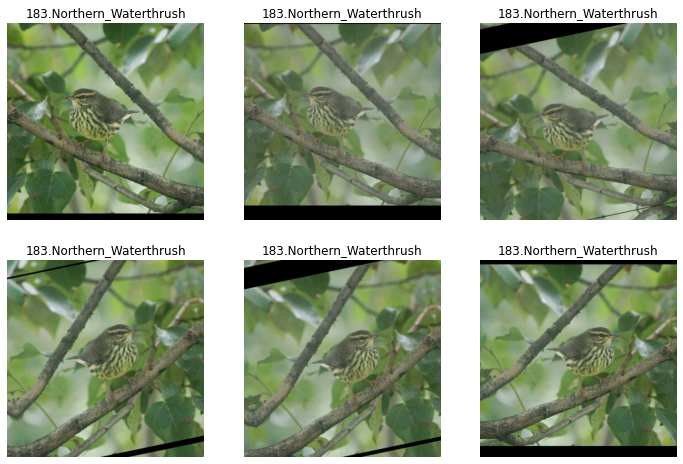

In [13]:
dls.show_batch(max_n=6, figsize=(12,8), unique=True)

> Data augmentation is in general a topic worth thinking hard about each time you face a new data set. Certain transformations may be very important to include as data augmentation (to increase raw model performance or make the model more invariant to certain transformations), others should not be included as they can be completely unrealistic or change what the label of the image should be. In practice, designing good data augmentation strategies may require substantial domain knowledge.

> We'll have more to say about this later.

In [14]:
learn = cnn_learner(dls, resnet18, metrics=accuracy).to_fp16()

/home/ubuntu/anaconda3/envs/pcs956/lib/python3.8/site-packages/fastai/callback/schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


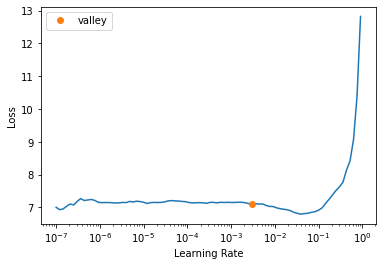

In [15]:
lr = learn.lr_find()

In [16]:
lr

SuggestedLRs(valley=0.0030199517495930195)

In [17]:
learn.fine_tune(7, base_lr=lr.valley)

> We'll have a look at other, more advanced data augmentation techniques later in the course.

### Test-time augmentation

We can use the data augmentations also at test time by producing multiple predictions for each image, one for each of a set of random data augmentations applied to the image. This is called _test-time augmentation_ or TTA.

Here's the result without TTA:

In [18]:
y_preds_proba, y_true = learn.get_preds()

In [19]:
accuracy(y_preds_proba, y_true)

TensorBase(0.8333)

Here's the result with TTA:

In [20]:
y_preds_proba, y_true = learn.tta()

In [21]:
accuracy(y_preds_proba, y_true)

TensorBase(0.8379)

### Other CNN model architectures

We used an 18 layer ResNet above. Let's try a couple of different model architectures:

> **NB:** The below experiment will take a _long_ time to run, and require quite a lot of computational resources. You may want to just browse the code and its output, and try the approach on your own data later.

In [ ]:
models = {
    'dn169':       densenet169,
    'rn50':        resnet50,
    'squeezenet':  squeezenet1_0,
    'rn34':        resnet34, 
    'dn121':       densenet121, 
}

In [ ]:
epochs = 10
preds = {} # For storing the model predictions
acc = {}   # For storing the model accuracies

for m in models.keys():
    print(f"Training the model {m}\n")
    learn = cnn_learner(dls, models[m], metrics=accuracy).to_fp16()
    lr = learn.lr_find(show_plot=False)
    learn.fine_tune(epochs, base_lr=lr.valley)
    y_preds_probs, y_true = learn.tta()
    preds[m] = y_preds_probs
    acc[m] = accuracy(y_preds_probs, y_true)
    print(f"Accuracy for model {m} with TTA is {acc[m]}")
    print('#'*40)

### Here are the training outputs

<img src="assets/other_models_results.png">

### Performance

In [22]:
# Code used to save precomputed results to disk, for reference
#
def save_obj(obj, name):
    with open(f'assets/{name}.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(f'assets/{name}.pkl', 'rb') as f:
        return pickle.load(f)
    
#save_obj(acc, 'acc')
#save_obj(preds, 'preds')

In [23]:
# Load the results from disk if you didn't run the above training process:
acc = load_obj('acc')
preds = load_obj('preds')

Here are the accuracies for the models we tried:

In [24]:
acc

{'dn169': TensorBase(0.8787),
 'rn50': TensorBase(0.8672),
 'squeezenet': TensorBase(0.7679),
 'rn34': TensorBase(0.8608),
 'dn121': TensorBase(0.8706)}

We note that most of the models have a similar score

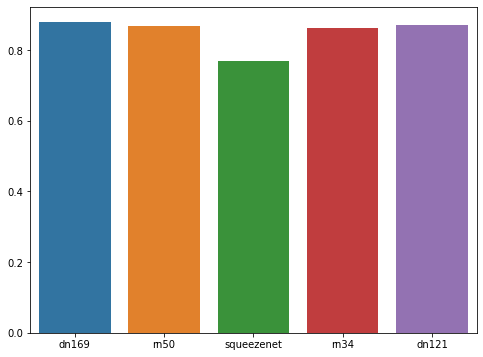

In [25]:
import seaborn as sns
plt.figure(figsize=(8,6))
vals = [float(a) for a in acc.values()]
sns.barplot(x=list(acc.keys()), y=vals)
plt.show()

Here are the model predictions:

In [26]:
preds

{'dn169': tensor([[3.1148e-07, 7.0195e-07, 1.7492e-06,  ..., 1.0872e-07, 2.0647e-07,
          1.6988e-06],
         [6.1327e-06, 9.6754e-06, 3.4244e-07,  ..., 2.2451e-04, 4.8925e-05,
          3.8752e-06],
         [4.1900e-10, 4.1061e-10, 1.2388e-11,  ..., 3.3533e-08, 1.8584e-11,
          6.4962e-09],
         ...,
         [1.0349e-06, 1.4082e-06, 9.3582e-07,  ..., 8.9326e-01, 6.8927e-04,
          6.3631e-06],
         [2.3048e-06, 5.3050e-05, 1.5456e-06,  ..., 2.7687e-07, 3.7282e-07,
          3.9670e-07],
         [1.6766e-10, 4.3017e-08, 1.2031e-08,  ..., 1.7888e-08, 1.0423e-07,
          3.7089e-10]]),
 'rn50': tensor([[1.3427e-06, 2.0423e-06, 1.0785e-05,  ..., 1.9683e-06, 2.5384e-05,
          1.8499e-04],
         [3.8300e-07, 5.5785e-06, 2.0666e-06,  ..., 9.8065e-04, 1.2837e-04,
          9.2380e-07],
         [2.4066e-09, 9.4248e-10, 9.4208e-09,  ..., 4.1706e-09, 3.2647e-10,
          3.5872e-09],
         ...,
         [1.1086e-06, 1.2442e-06, 3.4081e-06,  ..., 7.5112e-01

### Model ensembling

> TODO: Can use different splits of data to obtain different models: boosting. Then we need a test set..

In [27]:
acc = load_obj('acc')
preds = load_obj('preds')

Once you have multiple models of similar performance, a simple trick to obtain an even better model is to construct an _ensemble_. 

For classifiers, a simple strategy is to have each model in the ensemble vote on a class, and then use the majority class as the final output prediction. This is called _hard voting_. 

Another frequently used simple strategy is to use the average of the models confidence scores, and then use a threshold to obtain the final predictions. In other words, a model that's more confidence than another model for a given instance contributes more to the prediction. This is called _soft voting_. 

Here's an example of soft voting, using the models trained above, except the SqueezeNet:

In [28]:
preds.keys()

dict_keys(['dn169', 'rn50', 'squeezenet', 'rn34', 'dn121'])

In [29]:
del preds['squeezenet']
del acc['squeezenet']

In [31]:
# We add all the predictions from the different models together
added_probs = list(preds.values())[0]
for p in list(preds.values())[1:]:
    added_probs += p
# then divide by the number of predictions
ensembled_probs = added_probs/len(list(preds.values())[0])

In [32]:
acc['ensemble'] = accuracy(ensembled_probs, y_true)

In [33]:
acc

{'dn169': TensorBase(0.8787),
 'rn50': TensorBase(0.8672),
 'rn34': TensorBase(0.8608),
 'dn121': TensorBase(0.8706),
 'ensemble': TensorBase(0.8927)}

### No pretraining

Note that all the above results were obtained with models _pretrained_ on the ImageNet challenge data. This makes the comparison with the 2014 state-of-the-art results unfair, as the ImageNet data set didn't exist back then. 

Therefore, let's try again without pre-training.

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy, pretrained=False).to_fp16()

In [ ]:
learn.unfreeze()

In [ ]:
lr = learn.lr_find()

In [ ]:
lr

In [ ]:
learn.fit_one_cycle(50, lr_max=lr.valley)

#### Precomputed output:

<img width=40% src="assets/cub-no-pretrain.png">